# logistics optimization

- `GpsProvider` : Penyedia GPS
- `BookingID` : Identifikasi unik untuk perjalanan
- `Market/Regular` : Jenis perjalanan. Regular - Vendor yang memiliki kontrak dengan kita. Market - Vendor yang tidak memiliki kontrak dengan kita
- `BookingID_Date` : Tanggal ketika pemesanan dibuat
- `vehicle_no` : Nomor truk
- `Origin_Location` : Tempat awal perjalanan
- `Destination_Location` : Tempat akhir perjalanan
- `Org_lat_lon` : Koordinat lintang/bujur tempat awal
- `Des_lat_lon` : Koordinat lintang/bujur tempat akhir
- `Data_Ping_time` : Waktu ketika kita menerima sinyal GPS
- `Planned_ETA` : Perkiraan Waktu Kedatangan yang Direncanakan
- `Current_Location` : Lokasi truk secara langsung
- `DestinationLocation` : Ulang dari lokasi tujuan
- `actual_eta` : Waktu ketika truk tiba
- `Curr_lat` : Lintang saat ini - berubah setiap kali kita menerima sinyal GPS
- `Curr_lon` : Bujur saat ini - berubah setiap kali kita menerima sinyal GPS
- `ontime` : Jika truk tiba tepat waktu - dihitung berdasarkan Planned dan Actual ETA
- `delay` : Jika truk tiba dengan keterlambatan - dihitung berdasarkan Planned dan Actual ETA
- `OriginLocation_Code` : Kode tempat asal
- `DestinationLocation_Code` : Kode tempat tujuan
- `trip_start_date` : Tanggal/Waktu saat perjalanan dimulai
- `trip_end_date` : Tanggal/Waktu saat perjalanan berakhir - berdasarkan dokumentasi (tidak bisa digunakan untuk menghitung keterlambatan)
- `TRANSPORTATION_DISTANCE_IN_KM` - Total jarak perjalanan dalam kilometer
- `vehicleType` : Jenis truk
- `Minimum_kms_to_be_covered_in_a_day` : Jarak minimum yang harus dicover oleh pengemudi dalam sehari
- `Driver_Name` : Detail pengemudi
- `Driver_MobileNo` : Detail pengemudi
- `customerID` : Detail pelanggan
- `customerNameCode` : Detail pelanggan
- `supplierID` : Pemasok : Yang menyediakan kendaraan
- `supplierNameCode` : Pemasok - Yang menyediakan kendaraan

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [321]:
df = pd.read_excel("Delivery truck trip data.xlsx")
print(df.shape)

(6880, 32)


In [322]:
df['Org_lat_lon'].sample(5,random_state=23)

1815                      12.722686,77.676518
6505                12.0001,79.74839949999999
88                         9.973636,78.281783
1953    26.192290403509681,91.751276775362513
557                           12.8390,79.9540
Name: Org_lat_lon, dtype: object

# Exploratory Data Analysis (EDA)

## Info

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

In [324]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Curr_lat,5927.0,1.867999e+01,6.075561e+00,8.166790e+00,1.287187e+01,1.747092e+01,2.320201e+01,3.236793e+01
Curr_lon,5927.0,7.875975e+01,4.216357e+00,6.965770e+01,7.689186e+01,7.784334e+01,8.001900e+01,9.552955e+01
TRANSPORTATION_DISTANCE_IN_KM,6168.0,5.538563e+02,7.589818e+02,0.000000e+00,4.000000e+01,1.600000e+02,9.000000e+02,2.954700e+03
Minimum_kms_to_be_covered_in_a_day,2820.0,2.502394e+02,2.431548e+01,0.000000e+00,2.500000e+02,2.500000e+02,2.500000e+02,2.750000e+02
Driver_MobileNo,2691.0,8.598981e+09,1.131669e+09,6.000546e+09,7.651505e+09,8.930762e+09,9.634981e+09,1.000000e+10


In [325]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
GpsProvider,5927,29,CONSENT TRACK,3859
BookingID,6880,6875,MVCV0000798/082021,3
Market/Regular,6880,2,Regular,6811
vehicle_no,6880,2325,TS15UC9341,37
Origin_Location,6880,180,"Mugabala, Bangalore Rural, Karnataka",572
Destination_Location,6880,520,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",342
Org_lat_lon,6880,173,"16.560192249175344,80.792293091599547",1189
Des_lat_lon,6880,522,"12.8390,79.9540",342
Current_Location,5916,2567,"Perumalpattu - Kottamedu Rd, Oragadam Industri...",198
DestinationLocation,6880,520,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",342


In [326]:
df.duplicated().sum()

0

In [327]:
df.isna().sum()

GpsProvider                            953
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                       964
DestinationLocation                      0
actual_eta                              37
Curr_lat                               953
Curr_lon                               953
ontime                                4332
delay                                 2538
OriginLocation_Code                      3
DestinationLocation_Code                27
trip_start_date                          0
trip_end_date                          194
TRANSPORTATION_DISTANCE_IN_KM          712
vehicleType

## Missing Value

In [328]:
miss_value = pd.DataFrame( data = df.isna().sum(), columns={'Jumlah Miising Value'}, index=df.columns)
ratio_miss_value = pd.DataFrame(data=round(df.isna().sum() / len(df) * 100,2), columns={"ratio (%)"})
null = pd.concat([miss_value,ratio_miss_value],axis=1).sort_values(by='ratio (%)')

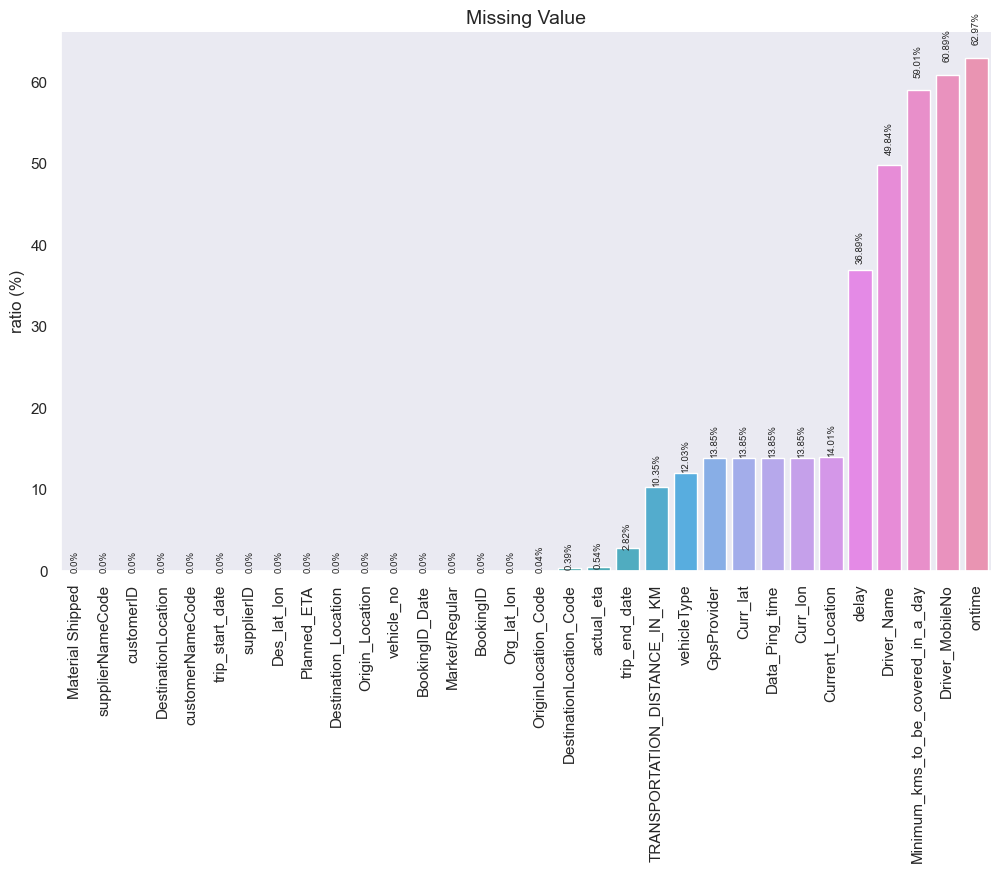

In [329]:
plt.figure(figsize=(12,7))
fig = sns.barplot(data=null, x=null.index, y=null['ratio (%)'])
plt.xticks(rotation=90)
plt.title("Missing Value", fontsize = 14)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(height)+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=7, rotation=90)

# Preprocessing 1

In [330]:
df_pre = df.copy()

## Imputasi Value (Delay & Ontime)

In [331]:
# Imputasi fitur ontime, dimana value diubah menjadi 1 jika G, dan 0 jika NaN.
df_pre['ontime'] = df_pre['ontime'].apply(lambda x : 1 if x=='G' else 0)
df_pre['ontime'].value_counts()

0    4332
1    2548
Name: ontime, dtype: int64

In [332]:
# Imputasi fitur delay, dimana value diubah menjadi 1 jika R, dan 0 jika NaN.
df_pre['delay'] = df_pre['delay'].apply(lambda x : 1 if x=='R' else 0)
df_pre['delay'].value_counts()

1    4342
0    2538
Name: delay, dtype: int64

In [333]:
print("delay = 0 dan ontime = 0 : " , df_pre[(df_pre['delay']==0) & (df_pre['ontime']==0)].shape[0] )
print("delay = 1 dan ontime = 1 : " , df_pre[(df_pre['delay']==1) & (df_pre['ontime']==1)].shape[0] )


# Karena Terdapat value yang tidak sinkron antara fitur ontime dan delay,
# Maka kita hanya memakai fitur 'Ontime'. Yang menyatakan 1 : ontime dan 0 : delay

delay = 0 dan ontime = 0 :  14
delay = 1 dan ontime = 1 :  24


## Handle Missing Value

In [334]:
# Jika Minimum_kms_to_be_covered_in_a_day : NaN, maka tidak ada batasan minimum_km ( minimum_km menjadi 0 km)
df_pre['Minimum_kms_to_be_covered_in_a_day'] = df_pre['Minimum_kms_to_be_covered_in_a_day'].fillna(0)

## Feature Extraction

In [335]:
!pip install geopy

**Distance**

- Ekstract Jarak berdasarkan koordinat latitude(Garis Lintang) dan longtitude(garis bujur).
- Distance = Jarak Koordinat(Latitude&Longtitude) Start Place ``Sampai`` Koordinat Destinasi / Tujuan Trip End Place

In [336]:
from geopy.distance import geodesic

# Menghitung jarak dan menambahkan kolom 'Distance(km)' ke DataFrame
df_pre['Distance(KM)'] = df_pre.apply(lambda x: geodesic(x['Org_lat_lon'], x['Des_lat_lon']).kilometers, axis=1)

# Menampilkan contoh hasil dengan kolom 'Org_lat_lon', 'Des_lat_lon', dan 'Distance(km)'
df_pre[['Org_lat_lon', 'Des_lat_lon', 'Distance(KM)']].sample(4, random_state=23)

,Org_lat_lon,Des_lat_lon,Distance(KM)
1815,"12.722686,77.676518","17.603892,78.629944",549.735797
6505,"12.0001,79.74839949999999","18.6725047,78.09408669999999",759.362980
88,"9.973636,78.281783","12.223062,76.690357",303.540541
1953,"26.192290403509681,91.751276775362513","26.655095,90.262004",157.162203


**Vehicle_state**

Ekstract State dari nomor kendaraan yang ada di India

In [337]:
df_pre['Vehicle_state'] = df_pre['vehicle_no'].apply(lambda x: x[:2])

**Origin Location**

In [338]:
origin_state_location = df_pre['Origin_Location'].str.split(',').str[-1]
df_pre['Origin_state_location'] = origin_state_location
df_pre['Origin_state_location'] = df_pre['Origin_state_location'].apply(lambda x: str.lower(x))
df_pre['Origin_state_location'] = df_pre['Origin_state_location'].str.strip()

**Destination Location**

In [339]:
Destination_state_location = df_pre['Destination_Location'].str.split(',').str[-1]
df_pre['Destination_state_location'] = Destination_state_location
df_pre['Destination_state_location'] = df_pre['Destination_state_location'].apply(lambda x: str.lower(x))
df_pre['Destination_state_location'] = df_pre['Destination_state_location'].str.strip()

In [340]:
df_pre[['vehicle_no','Vehicle_state','Origin_Location','Origin_state_location','Destination_Location','Destination_state_location']].head(4)

,vehicle_no,Vehicle_state,Origin_Location,Origin_state_location,Destination_Location,Destination_state_location
0,KA590408,KA,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU",tamil nadu,"ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",karnataka
1,TN30BC5917,TN,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",tamil nadu,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",tamil nadu
2,TN22AR2748,TN,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",pondicherry,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",pondicherry
3,TN28AQ0781,TN,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",tamil nadu,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",tamil nadu


**Kepadatan Pengiriman Berdasarkan Lokasi Dan Bulan-Tahun Pengiriman**

In [341]:
df_pre['Year_planned'] = df_pre['Planned_ETA'].dt.year
df_pre['Month_planned'] = df_pre['Planned_ETA'].dt.month
df_pre['Time_planned'] = df_pre['Year_planned'].astype(str) + '-' + df_pre['Month_planned'].astype(str)

In [342]:
group_time_destination = df_pre.groupby(['Time_planned','Destination_state_location'])[['BookingID']].count().reset_index()
group_time_destination.columns = ['Time_planned','Destination_state_location','Kepadatan_Pengiriman']
group_time_destination.head(3)

,Time_planned,Destination_state_location,Kepadatan_Pengiriman
0,1899-12,karnataka,1
1,1899-12,west bengal,1
2,2019-10,andhra pradesh,23


In [343]:
df_pre = df_pre.merge(group_time_destination, how='inner',
                left_on=['Time_planned','Destination_state_location'],
                right_on=['Time_planned','Destination_state_location']
                )

**Speed Travel**

In [344]:
df_pre[['BookingID_Date','Data_Ping_time','Planned_ETA','actual_eta','trip_start_date','trip_end_date']].isna().sum()

BookingID_Date       0
Data_Ping_time     953
Planned_ETA          0
actual_eta          37
trip_start_date      0
trip_end_date      194
dtype: int64

In [345]:
df_pre = df_pre.dropna(subset=['trip_end_date']) # Buang baris jika trip_end_date == Null
df_pre.shape

(6686, 40)

In [346]:
df_pre['lama_perjalanan(s)'] = (df_pre['trip_end_date'] - df_pre['trip_start_date']).astype('timedelta64[s]') 
#Karena Terdapat perjalanan yang relatif singkat (Hitungan Menit), Maka kita jadikan lama perjalanan dalam satuan Sekon (Detik)
df_pre[['trip_end_date','trip_start_date','lama_perjalanan(s)']].head()

,trip_end_date,trip_start_date,lama_perjalanan(s)
14,2020-08-26 11:18:39.910,2020-08-26 11:17:49,50.0
15,2020-08-26 11:35:54.353,2020-08-26 11:33:10,164.0
16,2020-08-26 17:06:32.503,2020-08-26 17:04:52,100.0
18,2020-08-27 16:25:25.000,2020-08-27 16:20:29,296.0
19,2020-08-27 16:12:42.017,2020-08-27 16:12:13,29.0


In [347]:
df_pre = df_pre[df_pre['lama_perjalanan(s)']>=0]
#Buang Jika ada lama perjalanan Minus. Karena pasti terdapat kesalahan dalam penginputan data (trip_end_date & trip_start_date)
df_pre.shape

(6618, 41)

In [348]:
df_pre['Speed(Km/s)'] = df_pre['Distance(KM)'] / df_pre['lama_perjalanan(s)']
df_pre[['Speed(Km/s)','Distance(KM)','lama_perjalanan(s)']]

,Speed(Km/s),Distance(KM),lama_perjalanan(s)
14,5.587211,279.360528,50.0
15,1.703418,279.360528,164.0
16,2.793605,279.360528,100.0
18,0.019460,5.760298,296.0
19,0.198631,5.760298,29.0
...,...,...,...
6875,0.017001,878.250130,51660.0
6876,0.000501,70.783193,141300.0
6877,0.000501,70.783193,141300.0
6878,0.000072,759.362980,10613760.0


# Insight

In [349]:
df_pre.head(3)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,Planned_ETA,Current_Location,DestinationLocation,actual_eta,Curr_lat,Curr_lon,ontime,delay,OriginLocation_Code,DestinationLocation_Code,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped,Distance(KM),Vehicle_state,Origin_state_location,Destination_state_location,Year_planned,Month_planned,Time_planned,Kepadatan_Pengiriman,lama_perjalanan(s),Speed(Km/s)
14,CONSENT TRACK,MVCV0001571/082021,Market,2020-08-26 11:17:49.000,TN21R2077,"ASHOK LEYLAND ENNORE,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 2-HOSUR,HOSUR,KARNATAKA","13.2150,80.3200","12.7660,77.7860",2020-08-26 11:10:16,2020-08-30 15:17:49.000,"Adiyaman College of Engineering Campus,, MGR N...","ASHOK LEYLAND PLANT 2-HOSUR,HOSUR,KARNATAKA",2020-08-28 10:35:58.630,12.714820,77.870760,1,0,CHEENNALLCCA1,HOSHOSALLCCA3,2020-08-26 11:17:49,2020-08-26 11:18:39.910,310.0,NaN,0.0,NaN,NaN,ALLEXCHE45,Ashok leyland limited,AVTEXMADNJ,ANNAI VELANKANNI TRANSPORT,STEUERGERAET MOTORMANAGEMENT / MDT BS6,279.360528,TN,tamil nadu,karnataka,2020,8,2020-8,163,50.0,5.587211
15,CONSENT TRACK,VCV00013034/082021,Regular,2020-08-26 11:35:41.760,TN23AZ8289,"ASHOK LEYLAND ENNORE,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 2-HOSUR,HOSUR,KARNATAKA","13.2150,80.3200","12.7660,77.7860",2020-08-26 15:10:15,2020-08-30 15:35:41.760,"Plot.no.6, Venkateswara housing Colony, Sri Ve...","ASHOK LEYLAND PLANT 2-HOSUR,HOSUR,KARNATAKA",2020-08-28 10:20:57.213,12.716235,77.875626,1,0,CHEENNALLCCA1,HOSHOSALLCCA3,2020-08-26 11:33:10,2020-08-26 11:35:54.353,310.0,NaN,0.0,BOOPALAN,NaN,ALLEXCHE45,Ashok leyland limited,VRLEXENN11,VINAYAKA ROADLINES,LU HIGH-PRESSURE TRANSFER PUMP FOR COMMO,279.360528,TN,tamil nadu,karnataka,2020,8,2020-8,163,164.0,1.703418
16,CONSENT TRACK,MVCV0001604/082021,Market,2020-08-26 17:04:52.000,TN41AH2583,"ASHOK LEYLAND ENNORE,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 2-HOSUR,HOSUR,KARNATAKA","13.2150,80.3200","12.7660,77.7860",2020-08-28 06:00:09,2020-08-30 21:04:52.000,"Unnamed Road, Ambur, Tamil Nadu 635802, India","ASHOK LEYLAND PLANT 2-HOSUR,HOSUR,KARNATAKA",2020-08-28 12:17:08.380,12.776642,78.709050,1,0,CHEENNALLCCA1,HOSHOSALLCCA3,2020-08-26 17:04:52,2020-08-26 17:06:32.503,310.0,NaN,0.0,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VRLEXENN11,VINAYAKA ROADLINES,RECTANGULAR RING,279.360528,TN,tamil nadu,karnataka,2020,8,2020-8,163,100.0,2.793605


## Ratio Ontime & Delay Time (Overall)

Text(0.5, 1.0, 'Ratio Ontime & Delay Time (Overall)')

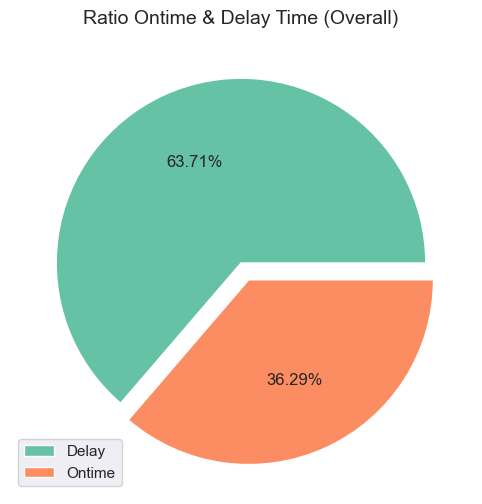

In [350]:
plt.figure(figsize=(12,6))
sns.set_theme(style='dark', palette='Set2')
plt.pie(x=df_pre['ontime'].value_counts(), autopct='%.2f%%', explode=[0,0.1])
plt.legend(['Delay','Ontime'])
plt.title('Ratio Ontime & Delay Time (Overall)', fontsize = (14))

## Ratio Ontime Terhadap Market / Reguler

In [351]:
ratio_ontime_market_reguler = df_pre.pivot_table(index='Market/Regular', columns='ontime', values='BookingID', aggfunc='count', fill_value=0).reset_index()
ratio_ontime_market_reguler.columns = ['Market/Regular',	'delay','ontime']

ratio_ontime_market_reguler['Ontime_ratio'] = ratio_ontime_market_reguler['ontime'] / (ratio_ontime_market_reguler['ontime'] + ratio_ontime_market_reguler['delay'])
ratio_ontime_market_reguler

,Market/Regular,delay,ontime,Ontime_ratio
0,Market,11,44,0.800000
1,Regular,4205,2358,0.359287


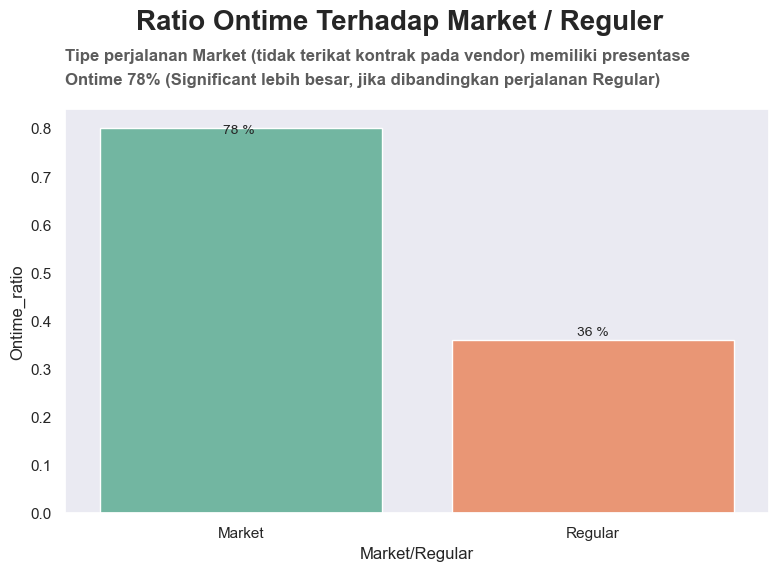

In [352]:
plt.figure(figsize=(8,6))
fig = sns.barplot(data=ratio_ontime_market_reguler, x='Market/Regular', y = 'Ontime_ratio')
fig.annotate(text='78 % ', xy=(0 , 0.79), ha='center', fontsize=10)
fig.annotate(text='36 %', xy=(1 , 0.37), ha='center', fontsize=10)

plt.text(x=-0.3, y=1.02, s='Ratio Ontime Terhadap Market / Reguler',
         fontsize=20, weight='bold', alpha=1,va='center')

plt.text(x=-0.5, y=0.95, s='Tipe perjalanan Market (tidak terikat kontrak pada vendor) memiliki presentase',
         fontsize=12, weight='bold', alpha=0.75,va='center')
plt.text(x=-0.5, y=0.90, s='Ontime 78% (Significant lebih besar, jika dibandingkan perjalanan Regular)',
         fontsize=12, weight='bold', alpha=0.75,va='center')
plt.tight_layout()

## Ratio Ontime Berdasarkan VehicleType 

In [353]:
vehicle_trans_dist = df_pre.pivot_table(values='Distance(KM)',columns='ontime', index='vehicleType', aggfunc=['mean','count'],fill_value=0).reset_index()
vehicle_trans_dist.columns = ['vehicleType', 'Distance_Delay', 'Distance_Ontime', 'count_Delay', 'count_Ontime']
vehicle_trans_dist['ratio_ontime'] = round(vehicle_trans_dist['count_Ontime'] / (vehicle_trans_dist['count_Delay'] + vehicle_trans_dist['count_Ontime']) * 100,2)
vehicle_trans_dist.head(3)

,vehicleType,Distance_Delay,Distance_Ontime,count_Delay,count_Ontime,ratio_ontime
0,1 MT Tata Ace (Closed Body),261.061158,272.252505,4,2,33.33
1,1 MT Tata Ace (Open Body),0.000000,266.733726,0,3,100.00
2,1.5 MT Pickup (Open Body),246.260187,266.939716,5,17,77.27


Text(0.5, 1.0, 'Top 10 Ratio Ontime Berdasarkan Jenis Kendaraan')

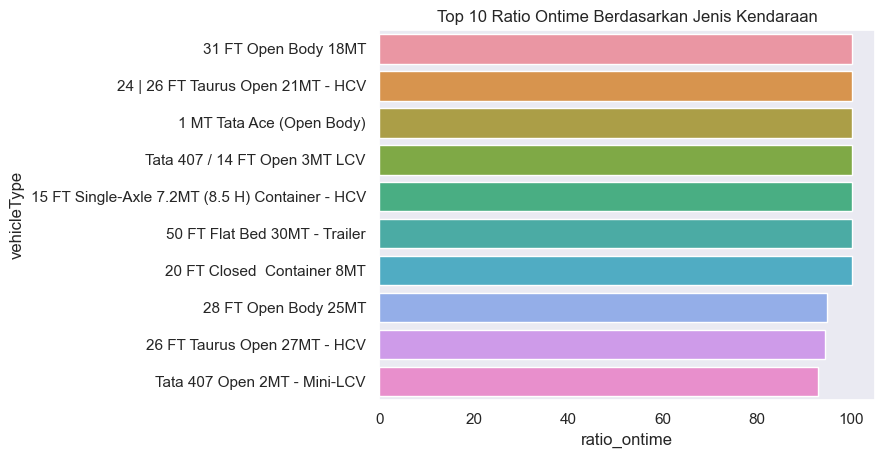

In [354]:
vehicle_trans_dist.sort_values(by='ratio_ontime', ascending=False, inplace=True)
vehicle_trans_dist.reset_index(drop=True, inplace=True)
# vehicle_trans_dist.iloc[:5,:]

sns.barplot(data=vehicle_trans_dist.iloc[:10,:], y = 'vehicleType', x = 'ratio_ontime')
plt.title('Top 10 Ratio Ontime Berdasarkan Jenis Kendaraan')

## Jumlah Distance Setiap VehicleType berdasarkan Ontime & Delaytime

Text(-5, 2300, 'Average Distance by Vehicle Type')

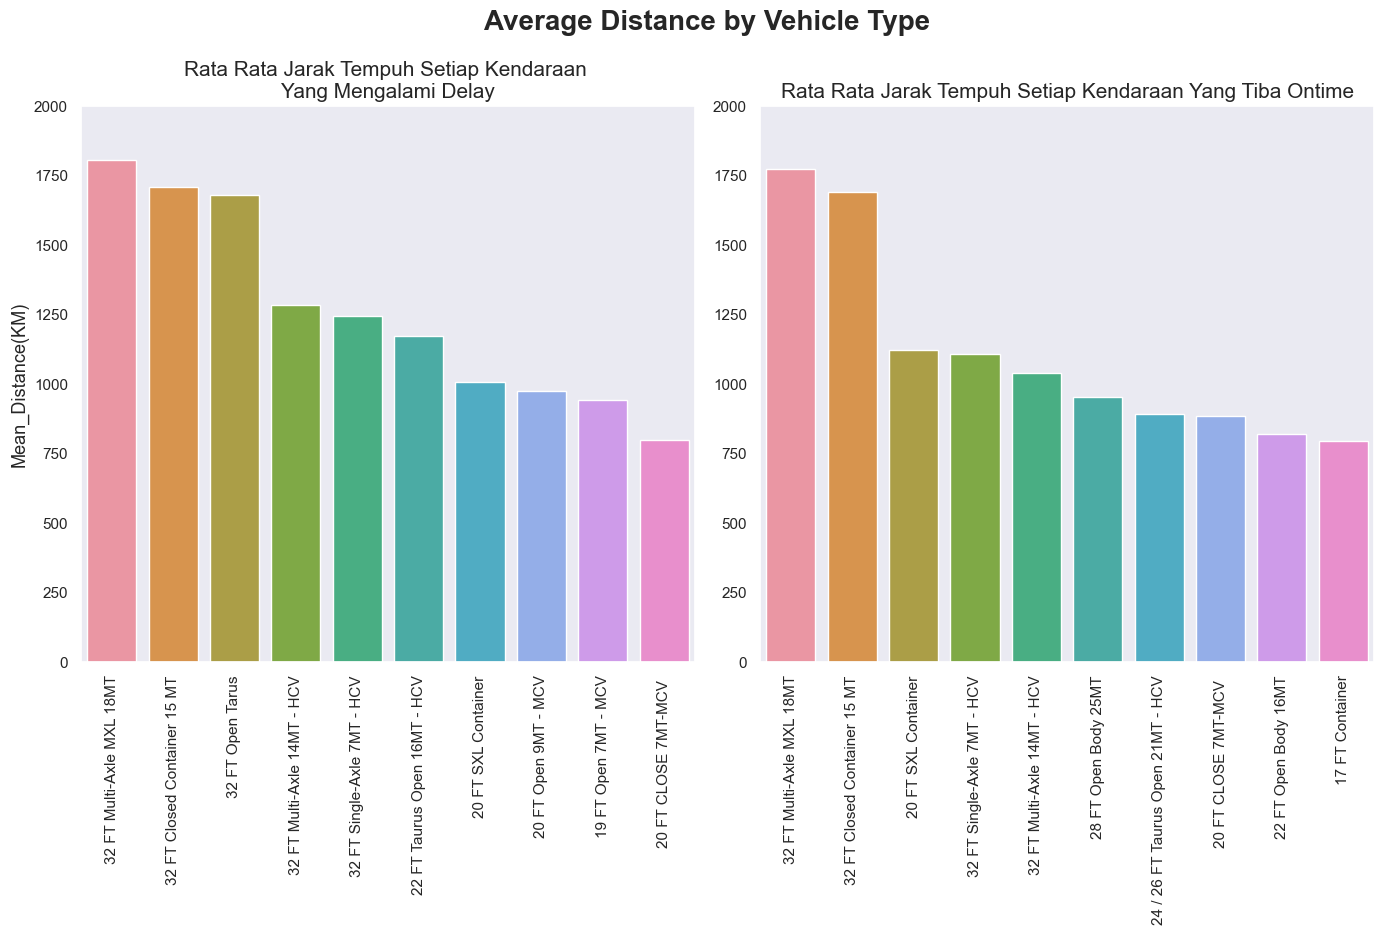

In [365]:
vehicle_trans_dist.sort_values(by='Distance_Delay', ascending=False, inplace=True)
vehicle_trans_dist.reset_index(drop=True, inplace=True)
vehicle_trans_dist.iloc[:5,:]

plt.figure(figsize=(14,9))
plt.subplot(1,2,1)
sns.barplot(data=vehicle_trans_dist.iloc[:10,:], x = 'vehicleType', y = 'Distance_Delay')
plt.xticks(rotation=90)
plt.ylabel('Mean_Distance(KM)',fontsize=13)
plt.xlabel('')
plt.ylim(0,2000)
plt.title('Rata Rata Jarak Tempuh Setiap Kendaraan \nYang Mengalami Delay', fontsize=15)

vehicle_trans_dist.sort_values(by='Distance_Ontime', ascending=False, inplace=True)
vehicle_trans_dist.reset_index(drop=True, inplace=True)
vtd2 = vehicle_trans_dist.iloc[:10,:]

plt.subplot(1,2,2)
fig1 = sns.barplot(data=vtd2, x = 'vehicleType', y = 'Distance_Ontime')
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')
plt.ylim(0,2000)
plt.title('Rata Rata Jarak Tempuh Setiap Kendaraan Yang Tiba Ontime', fontsize=15)
plt.tight_layout()


fig1.text(x=-5, y=2300, s='Average Distance by Vehicle Type',
         fontsize=20, weight='bold', alpha=1,va='center')

## Jumlah Distance Setiap Suplier

In [356]:
supplier_trans_dist = df_pre.pivot_table(values='Distance(KM)',columns='ontime', index='supplierNameCode', aggfunc=['mean','count'],fill_value=0).reset_index()
supplier_trans_dist.columns = ['Supplier', 'Distance_Delay', 'Distance_Ontime', 'count_Delay', 'count_Ontime']
supplier_trans_dist['ratio_ontime'] = round(supplier_trans_dist['count_Ontime'] / (supplier_trans_dist['count_Delay'] + supplier_trans_dist['count_Ontime']) * 100,2)
supplier_trans_dist.sort_values(by='ratio_ontime', ascending=False, inplace=True)
supplier_trans_dist.reset_index(drop=True, inplace=True)
supplier_trans_dist

,Supplier,Distance_Delay,Distance_Ontime,count_Delay,count_Ontime,ratio_ontime
0,SMB,0.000000,797.994998,0,3,100.0
1,GODAVARI LOGISTICS,0.000000,921.081141,0,1,100.0
2,Sri Balamurugan Transports,0.000000,225.727109,0,3,100.0
3,SUSEE TRANSPORTER,0.000000,0.000000,0,40,100.0
4,SUNDAR,0.000000,908.168230,0,1,100.0
...,...,...,...,...,...,...
288,NTEX TRANSPORTATION SERVICES PRIVATE LIMITED,1626.106772,0.000000,2,0,0.0
289,Nav Bharath,1253.177633,0.000000,2,0,0.0
290,New P.S.Logistics,73.490648,0.000000,2,0,0.0
291,North South,1070.528522,0.000000,3,0,0.0


Text(0.5, 1.0, 'Top 10 Ratio Ontime Berdasarkan Supplier')

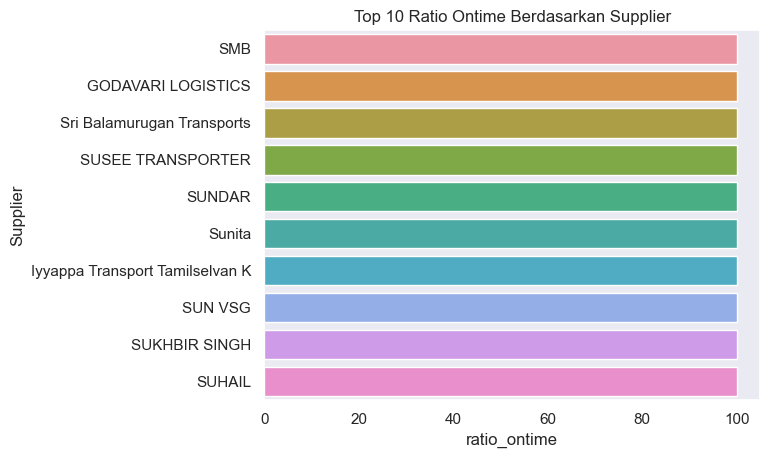

In [358]:
sns.barplot(data=supplier_trans_dist.iloc[:10,:], y = 'Supplier', x = 'ratio_ontime')
plt.title('Top 10 Ratio Ontime Berdasarkan Supplier')

Text(-5, 2300, 'Average Distance by Supplier')

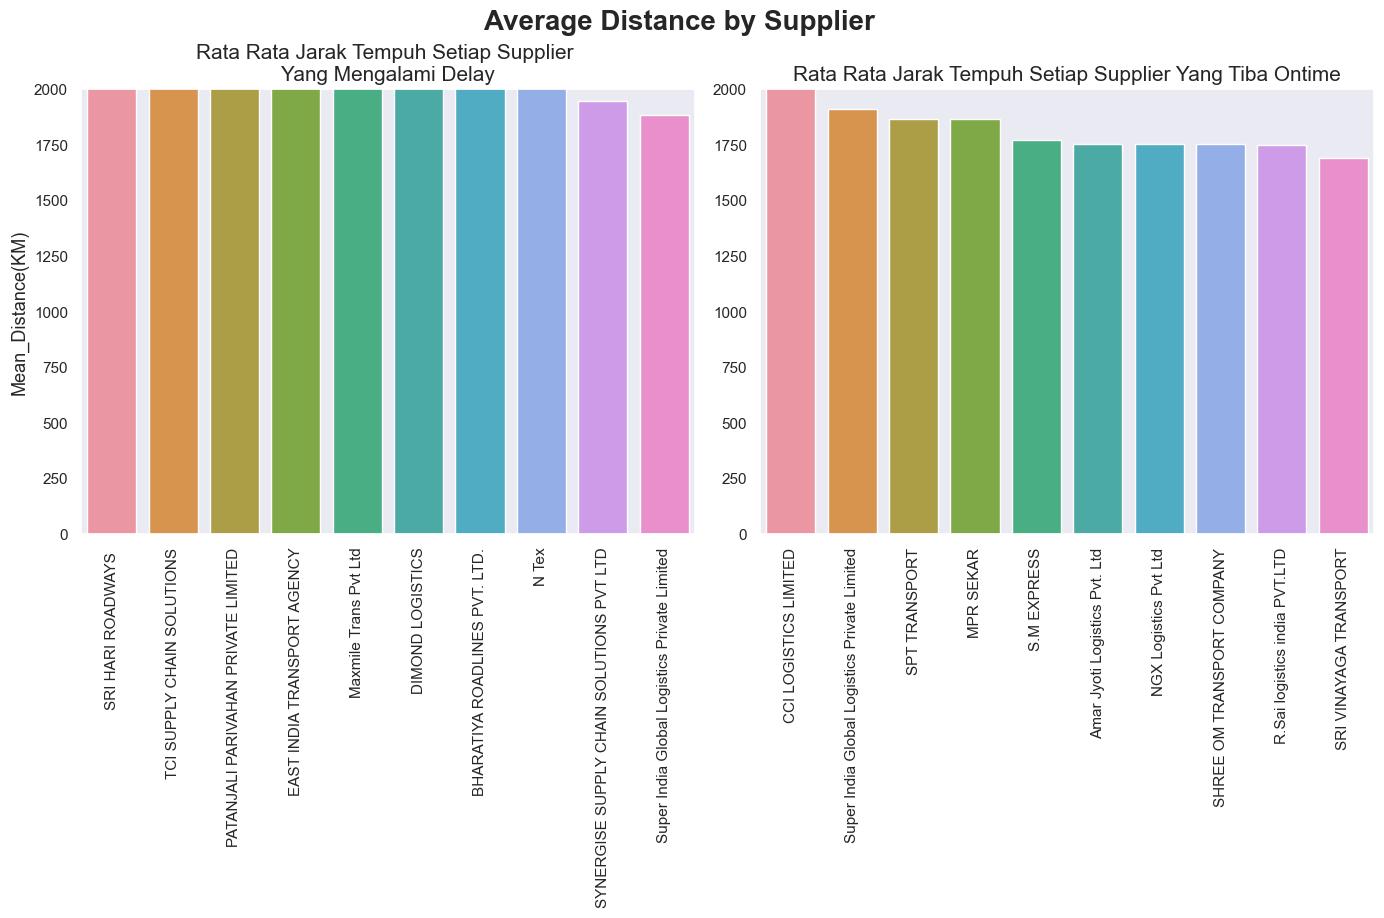

In [367]:
supplier_trans_dist.sort_values(by='Distance_Delay', ascending=False, inplace=True)
supplier_trans_dist.reset_index(drop=True, inplace=True)

plt.figure(figsize=(14,9))
plt.subplot(1,2,1)
sns.barplot(data=supplier_trans_dist.iloc[:10,:], x = 'Supplier', y = 'Distance_Delay')
plt.xticks(rotation=90)
plt.ylabel('Mean_Distance(KM)',fontsize=13)
plt.xlabel('')
plt.ylim(0,2000)
plt.title('Rata Rata Jarak Tempuh Setiap Supplier \nYang Mengalami Delay', fontsize=15)

supplier_trans_dist.sort_values(by='Distance_Ontime', ascending=False, inplace=True)
supplier_trans_dist.reset_index(drop=True, inplace=True)
vtd2 = supplier_trans_dist.iloc[:10,:]

plt.subplot(1,2,2)
fig1 = sns.barplot(data=vtd2, x = 'Supplier', y = 'Distance_Ontime')
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')
plt.ylim(0,2000)
plt.title('Rata Rata Jarak Tempuh Setiap Supplier Yang Tiba Ontime', fontsize=15)
plt.tight_layout()

fig1.text(x=-5, y=2300, s='Average Distance by Supplier',
         fontsize=20, weight='bold', alpha=1,va='center')

## Most Ontime Supplier with Ontime Ratio

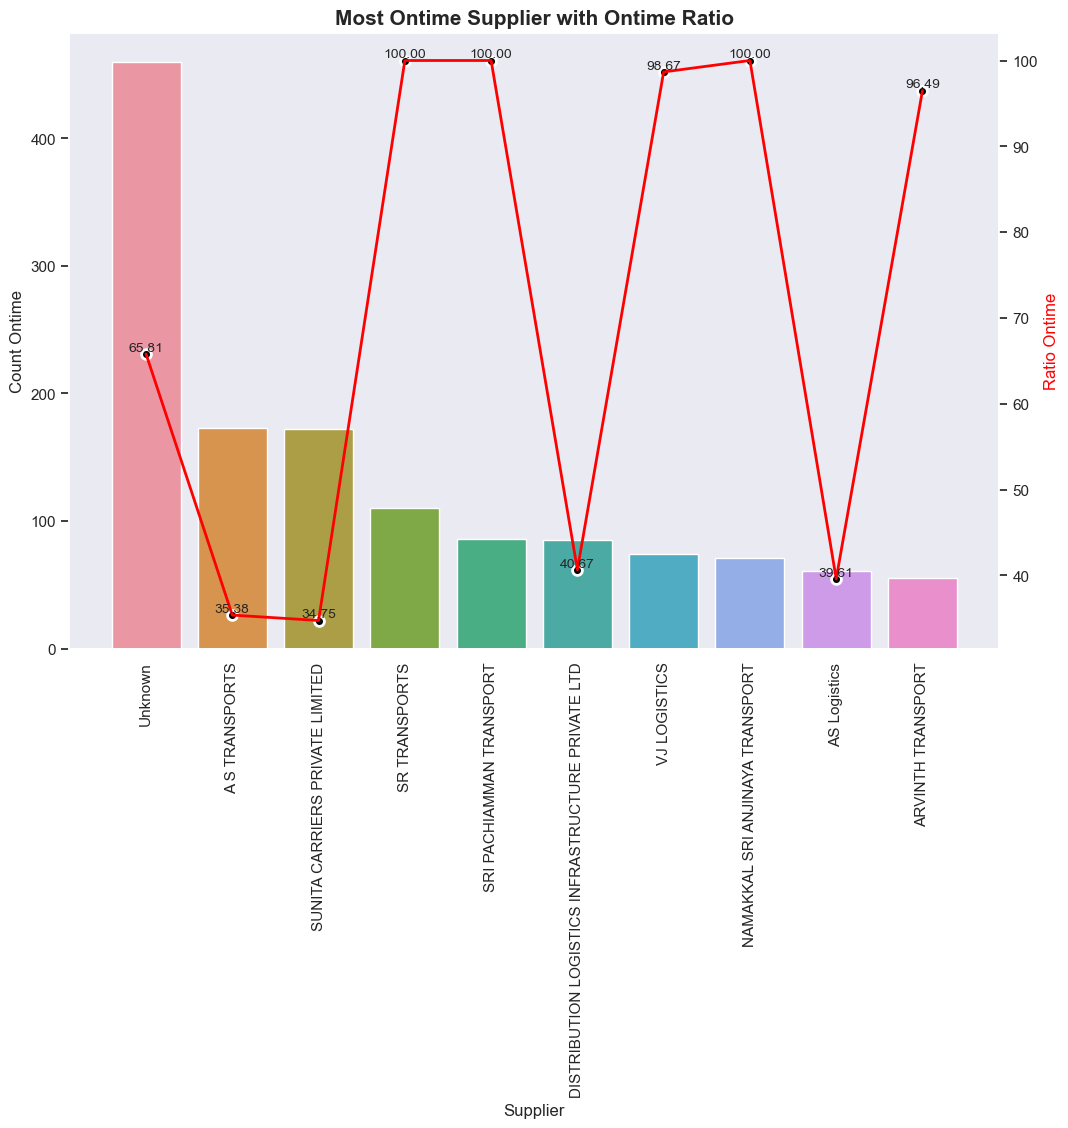

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

most_ontime = supplier_trans_dist.sort_values(by='count_Ontime', ascending=False).head(10)
sns.barplot(data=most_ontime, x='Supplier', y='count_Ontime', ax=ax1)
ax1.set_ylabel('Count Ontime')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

sns.lineplot(data=most_ontime, x='Supplier', y='ratio_ontime', ax=ax2, linewidth=2, color='r')
sns.scatterplot(data=most_ontime, x='Supplier', y='ratio_ontime', ax=ax2, linewidth=2, color='black', s=50)
ax2.set_ylabel('Ratio Ontime', color='r') 

for x, y in zip(most_ontime['Supplier'], most_ontime['ratio_ontime']):
    ax2.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Most Ontime Supplier with Ontime Ratio', fontsize = 15, weight='bold')
plt.show()


## Most Delayed Delivery Destinations

In [259]:
delay_des = df_pre[df_pre['ontime']==0].groupby(['Destination_state_location'])[['BookingID']].count().sort_values(by='BookingID', ascending=False).reset_index().head(5)
ontime_des = df_pre[df_pre['ontime']==1].groupby(['Destination_state_location'])[['BookingID']].count().sort_values(by='BookingID', ascending=False).reset_index().head(5)

In [260]:
delay_des['Destination_state_location'] = delay_des['Destination_state_location'].str.strip()
ontime_des['Destination_state_location'] = ontime_des['Destination_state_location'].str.strip()

In [261]:
delay_des

,Destination_state_location,BookingID
0,tamil nadu,740
1,karnataka,542
2,haryana,426
3,gujarat,408
4,maharashtra,346


Text(0, 850, 'Tamil Nadu dan Karnataka merupakan wilayah yang paling banyak menjadi tujuan Destinasi Delivery Logistic')

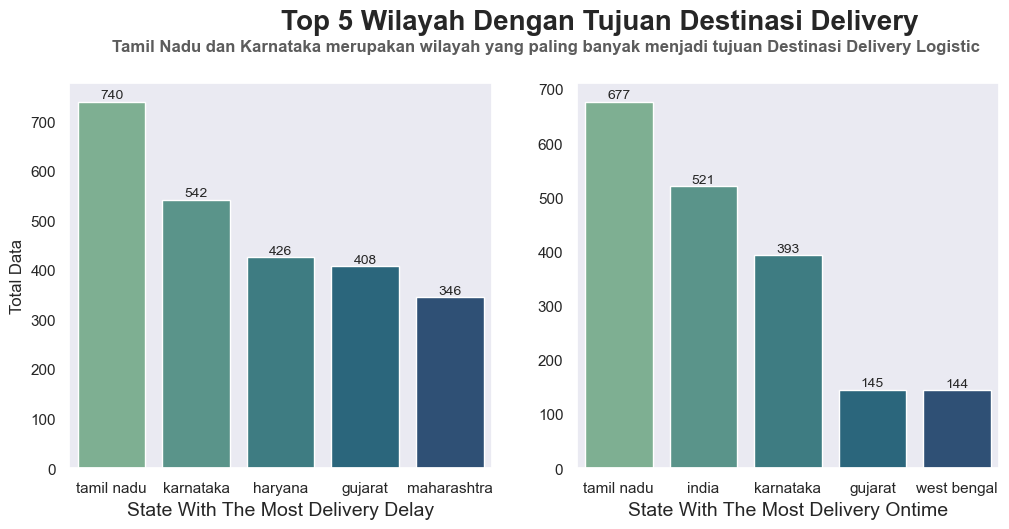

In [262]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
fig = sns.barplot(data=delay_des, x='Destination_state_location', y='BookingID',palette='crest')
plt.xlabel('State With The Most Delivery Delay', fontsize=14)
plt.ylabel('Total Data')
ls = delay_des['BookingID'].values
for x, y in zip(range(0,len(delay_des['BookingID'])), delay_des['BookingID']):
    fig.text(x, y, s=f'{ls[x]}', ha='center', va='bottom', fontsize=10)


plt.subplot(1,2,2)
fig2 = sns.barplot(data=ontime_des, x='Destination_state_location',y='BookingID', palette='crest')
plt.xlabel('State With The Most Delivery Ontime', fontsize=14)
plt.ylabel('')
ls = ontime_des['BookingID'].values
for x, y in zip(range(0,len(ontime_des['BookingID'])), ontime_des['BookingID']):
    fig2.text(x, y, s=f'{ls[x]}', ha='center', va='bottom', fontsize=10)
    

fig.text(x=2, y=900, s='Top 5 Wilayah Dengan Tujuan Destinasi Delivery',
         fontsize=20, weight='bold', alpha=1,va='center')
fig.text(x=0, y=850, s='Tamil Nadu dan Karnataka merupakan wilayah yang paling banyak menjadi tujuan Destinasi Delivery Logistic',
         fontsize=12, weight='bold', alpha=0.75,va='center')

## Grafik Perubahan Jumlah Ontime Delivery


In [263]:
df_pre[['BookingID_Date','Data_Ping_time','Planned_ETA','actual_eta','trip_start_date','trip_end_date']].isna().sum()

BookingID_Date       0
Data_Ping_time     950
Planned_ETA          0
actual_eta          37
trip_start_date      0
trip_end_date        0
dtype: int64

In [264]:
df_pre[['BookingID_Date','Data_Ping_time','Planned_ETA','actual_eta','trip_start_date','trip_end_date']].tail(5)

,BookingID_Date,Data_Ping_time,Planned_ETA,actual_eta,trip_start_date,trip_end_date
6875,2019-05-31 21:54:16,NaT,2019-06-02 04:06:00,2019-06-02 03:21:00,2019-06-01 13:00:00,2019-06-02 03:21:00
6876,2019-05-31 20:22:53,NaT,2019-06-03 04:02:00,2019-06-03 03:17:00,2019-06-01 12:02:00,2019-06-03 03:17:00
6877,2019-05-31 20:22:53,NaT,2019-06-03 04:03:00,2019-06-03 03:18:00,2019-06-01 12:03:00,2019-06-03 03:18:00
6878,2019-04-03 18:59:43,NaT,2019-08-04 16:00:43,2019-08-04 15:15:43,2019-04-03 18:59:43,2019-08-04 15:15:43
6879,2019-04-15 15:15:13,2019-06-14 15:20:12,1899-12-30 04:06:00,1899-12-30 03:21:00,1899-12-30 00:00:00,1899-12-30 03:21:00


In [265]:
group_ontime = df_pre[df_pre['ontime']==1].groupby(['Year_planned','Month_planned'])[['BookingID']].count().reset_index()
group_ontime.head(5)

,Year_planned,Month_planned,BookingID
0,1899,12,1
1,2019,3,173
2,2019,4,332
3,2019,5,373
4,2019,6,151


In [266]:
import plotly.graph_objects as go

gain_loss = [ group_ontime['BookingID'][i] - group_ontime['BookingID'][i-1] for i in range(1,len(group_ontime['BookingID'])) ]
gain_loss = [1] + gain_loss


fig = go.Figure(go.Waterfall(
    name="",
    orientation="v",
    measure=["relative"] * len(group_ontime),
    x=group_ontime['Month_planned'].astype(str) + ' - ' + group_ontime['Year_planned'].astype(str),
    textposition="outside",
    y=gain_loss,
    decreasing = {"marker":{"color":"#b20710"}},
    increasing = {"marker":{"color":"orange"}}
))

fig.update_layout(
    title="Grafik Perubahan Total Ontime Delivery Berdasarkan Estimasi Waktu Sampai (Group By Month)",
    title_font=dict(size=20, family="Courier New, monospace"),
    title_x=0.5,
    xaxis_title="Month and Year",
    yaxis_title="Count",
)
fig.show()

In [267]:
df_pre['Year_planned'] = df_pre['Planned_ETA'].dt.year
df_pre['Month_planned'] = df_pre['Planned_ETA'].dt.month
group_delay = df_pre[df_pre['ontime']==0].groupby(['Year_planned','Month_planned'])[['BookingID']].count().reset_index()
group_delay.head(3)

,Year_planned,Month_planned,BookingID
0,1899,12,1
1,2019,3,3
2,2019,4,2


In [268]:
gain_loss = [ group_delay['BookingID'][i] - group_delay['BookingID'][i-1] for i in range(1,len(group_delay['BookingID'])) ]
gain_loss = [1] + gain_loss
fig = go.Figure(go.Waterfall(
    name="",
    orientation="v",
    measure=["relative"] * len(group_delay),
    x=group_ontime['Month_planned'].astype(str)+ ', ' + group_delay['Year_planned'].astype(str),
    textposition="outside",
    y=gain_loss,
    decreasing = {"marker":{"color":"#b20710"}},
    increasing = {"marker":{"color":"orange"}}
))

fig.update_layout(
    title="Grafik Perubahan Total Delay Delivery Berdasarkan Estimasi Waktu Sampai (Group By Month)",
    title_font=dict(size=20, family="Courier New, monospace"),
    title_x=0.5,
    xaxis_title="Month and Year",
    yaxis_title="Count",
)
fig.show()

# Preprocessing 2

In [282]:
df_pre.head(2)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,Planned_ETA,Current_Location,DestinationLocation,actual_eta,Curr_lat,Curr_lon,ontime,delay,OriginLocation_Code,DestinationLocation_Code,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped,Distance(KM),Vehicle_state,Origin_state_location,Destination_state_location,Year_planned,Month_planned,Time_planned,Kepadatan_Pengiriman,lama_perjalanan(s),Speed(Km/s)
14,CONSENT TRACK,MVCV0001571/082021,Market,2020-08-26 11:17:49.000,TN21R2077,"ASHOK LEYLAND ENNORE,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 2-HOSUR,HOSUR,KARNATAKA","13.2150,80.3200","12.7660,77.7860",2020-08-26 11:10:16,2020-08-30 15:17:49.000,"Adiyaman College of Engineering Campus,, MGR N...","ASHOK LEYLAND PLANT 2-HOSUR,HOSUR,KARNATAKA",2020-08-28 10:35:58.630,12.714820,77.870760,1,0,CHEENNALLCCA1,HOSHOSALLCCA3,2020-08-26 11:17:49,2020-08-26 11:18:39.910,310.0,NaN,0.0,NaN,NaN,ALLEXCHE45,Ashok leyland limited,AVTEXMADNJ,ANNAI VELANKANNI TRANSPORT,STEUERGERAET MOTORMANAGEMENT / MDT BS6,279.360528,TN,tamil nadu,karnataka,2020,8,2020-8,163,50.0,5.587211
15,CONSENT TRACK,VCV00013034/082021,Regular,2020-08-26 11:35:41.760,TN23AZ8289,"ASHOK LEYLAND ENNORE,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 2-HOSUR,HOSUR,KARNATAKA","13.2150,80.3200","12.7660,77.7860",2020-08-26 15:10:15,2020-08-30 15:35:41.760,"Plot.no.6, Venkateswara housing Colony, Sri Ve...","ASHOK LEYLAND PLANT 2-HOSUR,HOSUR,KARNATAKA",2020-08-28 10:20:57.213,12.716235,77.875626,1,0,CHEENNALLCCA1,HOSHOSALLCCA3,2020-08-26 11:33:10,2020-08-26 11:35:54.353,310.0,NaN,0.0,BOOPALAN,NaN,ALLEXCHE45,Ashok leyland limited,VRLEXENN11,VINAYAKA ROADLINES,LU HIGH-PRESSURE TRANSFER PUMP FOR COMMO,279.360528,TN,tamil nadu,karnataka,2020,8,2020-8,163,164.0,1.703418


In [283]:
select_col = ['GpsProvider','Destination_state_location','vehicleType','Market/Regular','Minimum_kms_to_be_covered_in_a_day','Distance(KM)','Kepadatan_Pengiriman','Speed(Km/s)','ontime']
df_clean = df_pre[select_col]

In [284]:
df_clean.head(2)

,GpsProvider,Destination_state_location,vehicleType,Market/Regular,Minimum_kms_to_be_covered_in_a_day,Distance(KM),Kepadatan_Pengiriman,Speed(Km/s),ontime
14,CONSENT TRACK,karnataka,NaN,Market,0.0,279.360528,163,5.587211,1
15,CONSENT TRACK,karnataka,NaN,Regular,0.0,279.360528,163,1.703418,1


In [285]:
df_clean.isna().sum()

GpsProvider                           950
Destination_state_location              0
vehicleType                           746
Market/Regular                          0
Minimum_kms_to_be_covered_in_a_day      0
Distance(KM)                            0
Kepadatan_Pengiriman                    0
Speed(Km/s)                             0
ontime                                  0
dtype: int64

In [286]:
df_clean.select_dtypes(include='object').describe().T

,count,unique,top,freq
GpsProvider,5668,29,CONSENT TRACK,3702
Destination_state_location,6618,30,tamil nadu,1417
vehicleType,5872,44,40 FT 3XL Trailer 35MT,2554
Market/Regular,6618,2,Regular,6563


## Handling Missing Value

**FILLNA GpsProvider**

In [287]:
df_clean['GpsProvider'] = df_clean['GpsProvider'].fillna('Unknown')

**FILLNA VehicleType**

In [288]:
df_clean['vehicleType'] = df_clean['vehicleType'].fillna('Unknown')

## Endcoding

In [289]:
df_clean['GpsProvider_Endcode'] = df_clean['GpsProvider'].astype("category").cat.codes
df_clean['VehicleType_Endcode'] = df_clean['vehicleType'].astype("category").cat.codes
df_clean['Destination_state_location_Endcode'] = df_clean['Destination_state_location'].astype("category").cat.codes

In [290]:
endcode = pd.get_dummies(df_clean['Market/Regular'],prefix='Is')

In [291]:
df_clean = pd.concat([df_clean, endcode], axis=1)

In [292]:
df_clean.head(3)

,GpsProvider,Destination_state_location,vehicleType,Market/Regular,Minimum_kms_to_be_covered_in_a_day,Distance(KM),Kepadatan_Pengiriman,Speed(Km/s),ontime,GpsProvider_Endcode,VehicleType_Endcode,Destination_state_location_Endcode,Is_Market,Is_Regular
14,CONSENT TRACK,karnataka,Unknown,Market,0.0,279.360528,163,5.587211,1,4,44,15,1,0
15,CONSENT TRACK,karnataka,Unknown,Regular,0.0,279.360528,163,1.703418,1,4,44,15,0,1
16,CONSENT TRACK,karnataka,Unknown,Market,0.0,279.360528,163,2.793605,1,4,44,15,1,0


## Train Test Split

In [293]:
X = df_clean[['Destination_state_location_Endcode','Minimum_kms_to_be_covered_in_a_day','Distance(KM)','GpsProvider_Endcode','VehicleType_Endcode','Is_Market','Is_Regular','Kepadatan_Pengiriman','Speed(Km/s)']]
y = df_clean[['ontime']]

In [297]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Destination_state_location_Endcode','Minimum_kms_to_be_covered_in_a_day','Distance(KM)','GpsProvider_Endcode','VehicleType_Endcode','Is_Market','Is_Regular','Kepadatan_Pengiriman','Speed(Km/s)']] = scaler.fit_transform(X)
y.value_counts()

ontime
0         4216
1         2402
dtype: int64

In [298]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

# Modeling

In [299]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import  cross_validate, StratifiedKFold
import shap
def eval(model):
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    test_acc = accuracy_score(y_pred_test,y_test)
    train_acc = accuracy_score(y_pred_train,y_train)
    
    test_prec = precision_score(y_pred_test,y_test)
    train_prec = precision_score(y_pred_train,y_train)

    test_recal = recall_score(y_pred_test,y_test)
    train_recal = recall_score(y_pred_train,y_train)

    test_f1 = f1_score(y_pred_test,y_test)
    train_f1 = f1_score(y_pred_train,y_train)

    test_proba_roc = model.predict_proba(X_test)
    train_proba_train = model.predict_proba(X_train)

    train_roc = roc_auc_score(y_test, test_proba_roc[:, 1])
    test_roc = roc_auc_score(y_train, train_proba_train[:, 1])

    cv = cross_validate(estimator=model, X=X, y=y, cv=5, scoring='roc_auc', return_train_score=True)

    dic_eval = {
            'Metrics':['Accuracy','Precision','Recall','F1 Score','ROC_AUC', 'RocAuc_CrossVall'],
            'Test':[test_acc,test_prec,test_recal,test_f1,test_roc, cv['train_score'].mean()], 
            'Train':[train_acc,train_prec,train_recal,train_f1,train_roc,cv['test_score'].mean()]
        }

    return pd.DataFrame(data=dic_eval)

In [300]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    top_n = 25  # Ubah sesuai dengan jumlah fitur teratas yang ingin Anda tampilkan

    # Ambil n fitur teratas
    top_feat_importances = feat_importances.nlargest(top_n)

    # Buat plot dengan Seaborn
    plt.figure(figsize=(10, 8))
    sns.barplot(x=top_feat_importances, y=top_feat_importances.index)
    plt.xlabel('Skor')
    plt.ylabel('Fitur')
    plt.title('Skor Tingkat Kepentingan Fitur')

## Based Model

### Logistic Regression

In [301]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

eval(lr)

,Metrics,Test,Train
0,Accuracy,0.867069,0.862263
1,Precision,0.758112,0.752900
2,Recall,0.837134,0.859603
3,F1 Score,0.795666,0.802721
4,ROC_AUC,0.889942,0.878723
5,RocAuc_CrossVall,0.890687,0.880067


### KNN

In [302]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
eval(knn)

,Metrics,Test,Train
0,Accuracy,0.898288,0.903497
1,Precision,0.789086,0.798144
2,Recall,0.900673,0.932881
3,F1 Score,0.841195,0.860269
4,ROC_AUC,0.964418,0.952533
5,RocAuc_CrossVall,0.972751,0.843019


### Support Vector Machine

In [303]:
from sklearn.svm import SVC
sv = SVC(probability=True)
sv.fit(X=X_train, y=y_train)
eval(sv)

,Metrics,Test,Train
0,Accuracy,0.889225,0.888601
1,Precision,0.771386,0.771462
2,Recall,0.889456,0.915978
3,F1 Score,0.826224,0.837531
4,ROC_AUC,0.914026,0.902277
5,RocAuc_CrossVall,0.922207,0.816331


### Naive Bayes

In [304]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X=X_train, y=y_train)
eval(nb)

,Metrics,Test,Train
0,Accuracy,0.851964,0.850604
1,Precision,0.727139,0.741299
2,Recall,0.818937,0.838583
3,F1 Score,0.770312,0.786946
4,ROC_AUC,0.883322,0.870998
5,RocAuc_CrossVall,0.890098,0.875206


### Decision Tree

In [305]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X=X_train, y=y_train)
eval(dt)

,Metrics,Test,Train
0,Accuracy,0.933031,0.998489
1,Precision,0.911504,0.998840
2,Recall,0.894356,0.997105
3,F1 Score,0.902849,0.997972
4,ROC_AUC,0.999928,0.925126
5,RocAuc_CrossVall,0.999903,0.734848


In [306]:
hyperparameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini','log_loss'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

dt = DecisionTreeClassifier()
dt_tuning = GridSearchCV(estimator=dt, param_grid=hyperparameters, cv=5, scoring='accuracy')
dt_tuning.fit(X_train, y_train)
print(dt_tuning.best_estimator_)
eval(dt_tuning)

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='log2')


,Metrics,Test,Train
0,Accuracy,0.930010,0.998489
1,Precision,0.908555,0.998840
2,Recall,0.888889,0.997105
3,F1 Score,0.898614,0.997972
4,ROC_AUC,0.999928,0.922626
5,RocAuc_CrossVall,0.871861,0.836492


##  Ensemble

### Random Forrest

In [307]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X=X_train, y=y_train)
eval(rf)

,Metrics,Test,Train
0,Accuracy,0.945619,0.998489
1,Precision,0.918879,1.000000
2,Recall,0.921598,0.995956
3,F1 Score,0.920236,0.997974
4,ROC_AUC,0.999577,0.982270
5,RocAuc_CrossVall,0.999556,0.860062


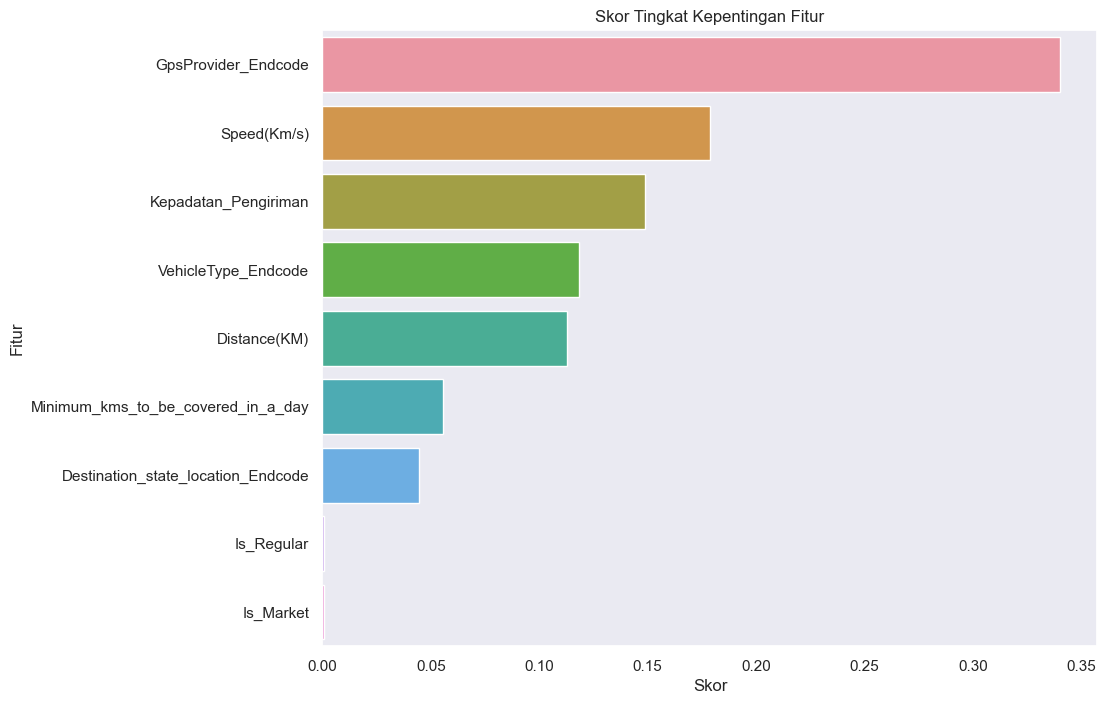

In [308]:
show_feature_importance(rf)

### XGBoost

In [309]:
from xgboost import XGBClassifier
XGBoost = XGBClassifier()
XGBoost.fit(X=X_train, y=y_train)
eval(XGBoost)

,Metrics,Test,Train
0,Accuracy,0.949144,0.991149
1,Precision,0.923304,0.990719
2,Recall,0.927407,0.985574
3,F1 Score,0.925351,0.988140
4,ROC_AUC,0.999236,0.982603
5,RocAuc_CrossVall,0.999168,0.869500


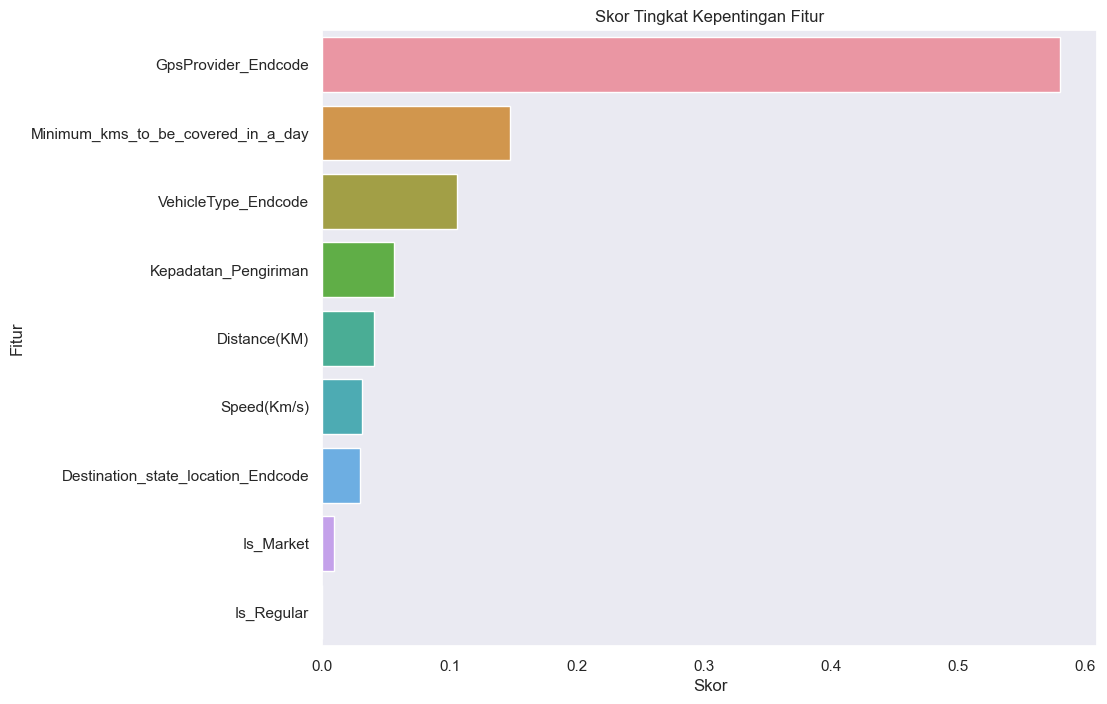

In [310]:
show_feature_importance(XGBoost)

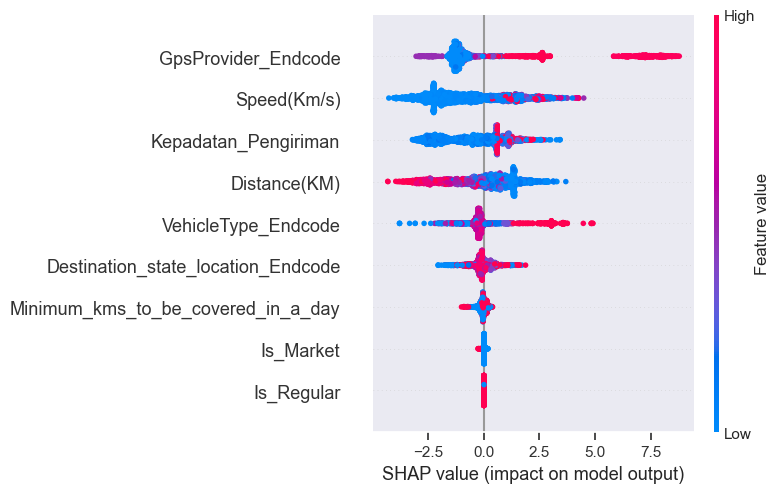

In [311]:
import shap
explainer = shap.TreeExplainer(XGBoost)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test) # Summary shap value terhadap label positive

### AdaBoost

In [312]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X=X_train, y=y_train)
eval(AdaBoost)

,Metrics,Test,Train
0,Accuracy,0.911380,0.916667
1,Precision,0.828909,0.833527
2,Recall,0.903537,0.935547
3,F1 Score,0.864615,0.881595
4,ROC_AUC,0.973913,0.965796
5,RocAuc_CrossVall,0.977559,0.887714


In [313]:
hyperparameters = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'algorithm': ['SAMME', 'SAMME.R']
}
AdaBoost = AdaBoostClassifier()
AdaBoost_tuned = RandomizedSearchCV(AdaBoost, hyperparameters, random_state=23, cv=5, scoring='accuracy')
AdaBoost_tuned.fit(X_train,y_train)

eval(AdaBoost_tuned)

,Metrics,Test,Train
0,Accuracy,0.934038,0.942142
1,Precision,0.864307,0.882831
2,Recall,0.937600,0.958438
3,F1 Score,0.899463,0.919082
4,ROC_AUC,0.990100,0.975928
5,RocAuc_CrossVall,0.924936,0.892971


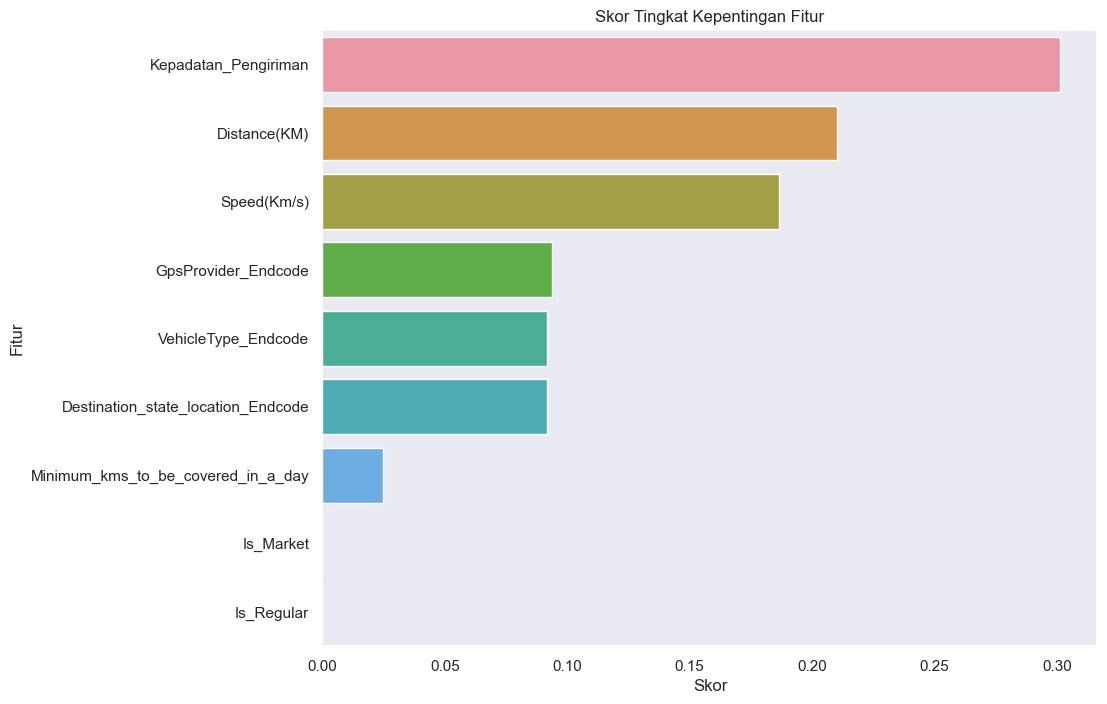

In [314]:
show_feature_importance(AdaBoost_tuned.best_estimator_)

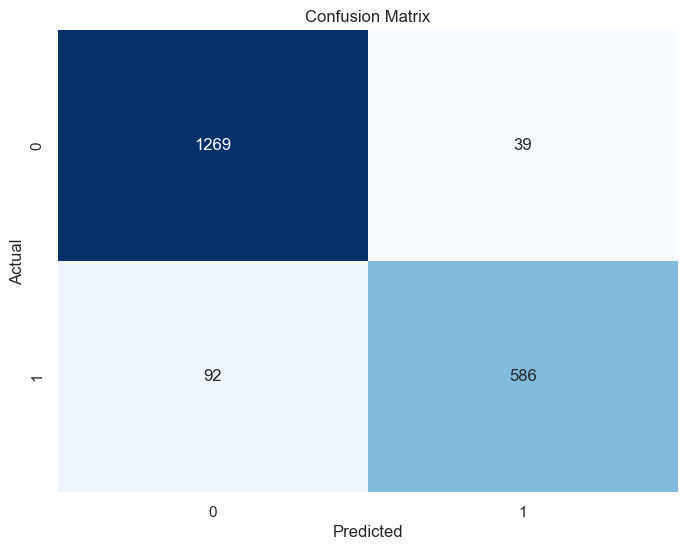

In [369]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = AdaBoost_tuned.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [370]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1308
           1       0.94      0.86      0.90       678

    accuracy                           0.93      1986
   macro avg       0.94      0.92      0.93      1986
weighted avg       0.93      0.93      0.93      1986



Model Summary

``Fitur yang paling berpengaruh pada model AdaBoost, adalah : ``
1. Kepadatan Pengiriman : Jumlah banyaknya booking Kendaraan, berdasarkan Periode Tahun-Bulan dalam suatu Provinsi
1. Distance(KM) : Yang merupakan jarak tempuh kendaraan dalam melakukan pengantaran dari titik awal ke titik tujuan.
2. Speed (KM/s) : Merupakan kecepatan untuk menempuh destinasi /tujua delivery, dari titik awal penjemputan.

``Berdasarkan Shap Value :``
1. Speed (KM/s) : Semakin kecil nilai kecepatan kendaraan, maka semakin berpeluang mengalami delay
2. Distance(KM) : Semakin tinggi jarak tempuh dalam delivery, maka semakin tinggi probabilitas untuk delay dan semakin rendah probabilitas untuk tiba ontime.


## SOAL 2

Methode 1. Dengan Numpy

In [382]:
import numpy as np

a = [5, 2, 3, 1, 2]
b = [2, 9, 22, 3, 22]

covariance_matrix = np.cov(a, b, ddof=1)
covariance = covariance_matrix[0, 1]

print("Kovariansi antara a dan b:", covariance)

Kovariansi antara a dan b: -2.45


Methode 2. Dengan Manual

In [386]:
def sample_covariance(a, b):
    mean_a = sum(a) / len(a)
    mean_b = sum(b) / len(b)

    summ = 0
    for i in range(len(a)):
        summ += (a[i] - mean_a) * (b[i] - mean_b)
    covariance = summ / (len(a) - 1)
    return covariance

a = [5, 2, 3, 1, 2]
b = [2, 9, 22, 3, 22]

print("Kovariansi a dan b:", sample_covariance(a, b))


Kovariansi a dan b: -2.45
